In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
from torch.distributions import Categorical

In [2]:
GAMMA = 0.99
MAX_EPISODES = 10000
EARLY_STOP_THRESHOLD = 480
EPISODES_EARLY_STOP = 30
NUM_NEURONS = 128

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [4]:
class PolicyNet(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(PolicyNet, self).__init__()
        
        self.dense = nn.Sequential(
            nn.Linear(input_shape, NUM_NEURONS),
            nn.ReLU(),
            nn.Linear(NUM_NEURONS, NUM_NEURONS),
            nn.ReLU(),
            nn.Linear(NUM_NEURONS, n_actions),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.dense(x)

In [5]:
def update():
    
    G = 0
    returns = []
    for _, _, reward in reversed(temp_buffer.get_data()):  # Back iteration
        G = reward + GAMMA * G
        returns.insert(0, G)  # Save the return

    # List to tensor
    states, actions, _ = zip(*temp_buffer.get_data())
    returns = torch.tensor(returns, dtype=torch.float32)

    loss_tot = 0

    for state, action, G in zip(states, actions, returns):

        action_probs = policy_net(state)  # Obtain the probability of each action
        dist = Categorical(action_probs)
        log_prob = dist.log_prob(action)
        loss_tot += log_prob * G

    optimizer.zero_grad()
    loss = -loss_tot
    loss.backward()
    optimizer.step()

    return loss.item()

In [6]:
class TemporaryBuffer():
    def __init__(self, maxlen):
        self.buffer = deque(maxlen=maxlen)
    
    def add(self, experience):
        self.buffer.append(experience)

    def reset(self):
        self.buffer.clear()

    def get_data(self):
        return list(self.buffer)

    def __len__(self):
        return len(self.buffer)

In [7]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

policy_net = PolicyNet(env.observation_space.shape[0], env.action_space.n)
temp_buffer = TemporaryBuffer(maxlen=500)

optimizer = optim.Adam(policy_net.parameters(), lr=0.0001)

In [8]:
episode_rewards = []
loss_values = []

for episode in range(MAX_EPISODES):

    temp_buffer.reset()

    observation, _ = env.reset(seed=SEED)
    state = torch.tensor(observation, dtype=torch.float32).unsqueeze(0)

    episode_reward = 0

    stop_training = False

    for t in range(1000):   # Max steps per episode of the environment is 500
        
        action_probs = policy_net(state)  # Obtain the probability of each action
        dist = Categorical(action_probs)  
        action = dist.sample()  # Sample an action from the distribution
        next_observation, reward, done, truncated, _ = env.step(action.item())
        next_state = torch.tensor(next_observation, dtype=torch.float32).unsqueeze(0)

        done = done or truncated

        temp_buffer.add((state, action, reward))

        if episode >= EPISODES_EARLY_STOP and np.mean(episode_rewards[-EPISODES_EARLY_STOP:]) > EARLY_STOP_THRESHOLD:    
            print(f"Early stopping at episode {episode}")
            stop_training = True
            break

        episode_reward += reward

        state = next_state

        if done:
            print(f"Episode {episode} finished after {t+1} timesteps")
            break


    # Update policy
    loss = update()
    loss_values.append(loss)

    episode_rewards.append(episode_reward)
    print(f"Episode {episode}, reward: {episode_reward}, loss: {loss}")
    
    if stop_training:
        break

env.close()

Episode 0 finished after 19 timesteps
Episode 0, reward: 19.0, loss: 124.9374008178711
Episode 1 finished after 14 timesteps
Episode 1, reward: 14.0, loss: 69.43196868896484
Episode 2 finished after 24 timesteps
Episode 2, reward: 24.0, loss: 193.3603973388672
Episode 3 finished after 8 timesteps
Episode 3, reward: 8.0, loss: 24.301965713500977
Episode 4 finished after 23 timesteps
Episode 4, reward: 23.0, loss: 178.62387084960938
Episode 5 finished after 51 timesteps
Episode 5, reward: 51.0, loss: 783.5015258789062
Episode 6 finished after 16 timesteps
Episode 6, reward: 16.0, loss: 90.03572082519531
Episode 7 finished after 24 timesteps
Episode 7, reward: 24.0, loss: 192.02210998535156
Episode 8 finished after 29 timesteps
Episode 8, reward: 29.0, loss: 275.1673278808594
Episode 9 finished after 29 timesteps
Episode 9, reward: 29.0, loss: 275.1728210449219
Episode 10 finished after 19 timesteps
Episode 10, reward: 19.0, loss: 123.94647979736328
Episode 11 finished after 21 timesteps


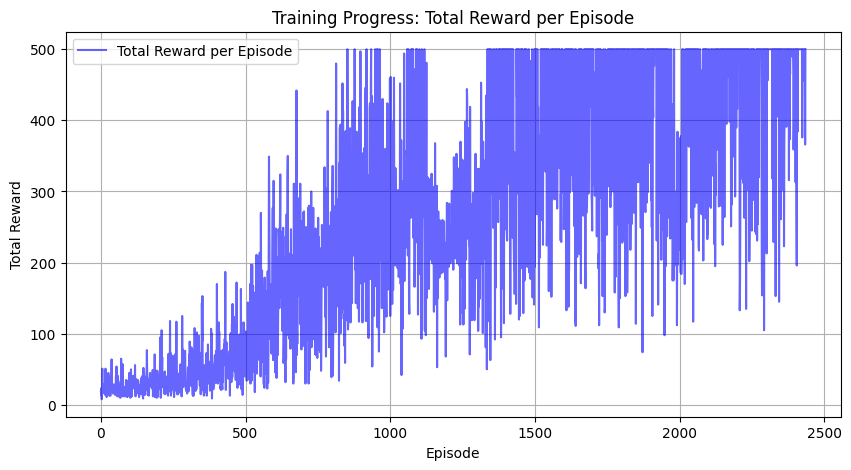

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(len(episode_rewards)-1), episode_rewards[:-1], label="Total Reward per Episode", color='blue', alpha=0.6)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress: Total Reward per Episode")
plt.legend()
plt.grid(True)
plt.show()

reward_tot 1.0
reward_tot 2.0
reward_tot 3.0
reward_tot 4.0
reward_tot 5.0
reward_tot 6.0
reward_tot 7.0
reward_tot 8.0
reward_tot 9.0
reward_tot 10.0
reward_tot 11.0
reward_tot 12.0
reward_tot 13.0
reward_tot 14.0
reward_tot 15.0
reward_tot 16.0
reward_tot 17.0
reward_tot 18.0
reward_tot 19.0
reward_tot 20.0
reward_tot 21.0
reward_tot 22.0
reward_tot 23.0
reward_tot 24.0
reward_tot 25.0
reward_tot 26.0
reward_tot 27.0
reward_tot 28.0
reward_tot 29.0
reward_tot 30.0
reward_tot 31.0
reward_tot 32.0
reward_tot 33.0
reward_tot 34.0
reward_tot 35.0
reward_tot 36.0
reward_tot 37.0
reward_tot 38.0
reward_tot 39.0
reward_tot 40.0
reward_tot 41.0
reward_tot 42.0
reward_tot 43.0
reward_tot 44.0
reward_tot 45.0
reward_tot 46.0
reward_tot 47.0
reward_tot 48.0
reward_tot 49.0
reward_tot 50.0
reward_tot 51.0
reward_tot 52.0
reward_tot 53.0
reward_tot 54.0
reward_tot 55.0
reward_tot 56.0
reward_tot 57.0
reward_tot 58.0
reward_tot 59.0
reward_tot 60.0
reward_tot 61.0
reward_tot 62.0
reward_tot 63.0
r

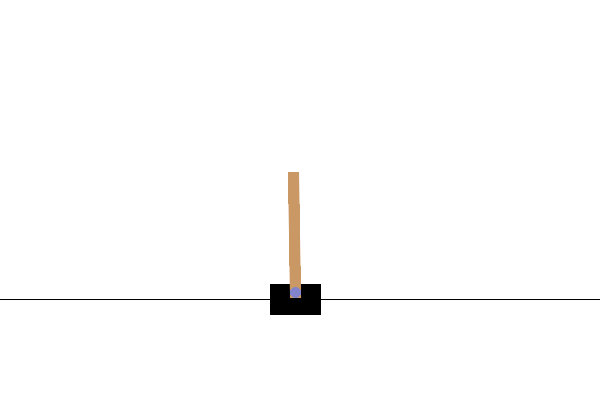

In [12]:
import gym
import torch
import imageio
import numpy as np
import matplotlib.pyplot as plt

def test_agent_and_create_gif(model, env, filename="cartpole_reinforce_test.gif"):
    reward_tot = 0
    frames = []
    observation, _ = env.reset()
    state = torch.tensor(observation, dtype=torch.float32).unsqueeze(0)
    
    done = False
    while not done:
        with torch.no_grad():
            action = model(state).argmax(dim=1).item()
        
        next_observation, reward, done, truncated, _ = env.step(action)
        frames.append(env.render())
        
        state = torch.tensor(next_observation, dtype=torch.float32).unsqueeze(0)

        reward_tot += reward

        print(f"reward_tot {reward_tot}")

        if truncated:
            break
    
    env.close()

    # Save the GIF
    imageio.mimsave(filename, frames, fps=30)
    print(f"GIF salvata come {filename}")

    # Show the GIF
    from IPython.display import display, Image
    display(Image(filename=filename))

test_agent_and_create_gif(policy_net, env)
